## Objective
Pens and Printers adapts sales tactics to changing consumer behavior, focusing on launching a new product line efficiently. Testing three sales strategies for office stationery, they aim to identify the most effective approach quickly. Leveraging customer trust, the company seeks to maintain relationships while driving sales growth.o.a:

## Data Validation:

The data file has 15,000 rows and 8 columns (numeric and categorical data). Here are the cleaning steps I took for every column in the data:

- week : No change.
- sales_method : Corrected. Misspelling such as em + call & email corrected to Email + Call & Email.
- customer_id 	:    No change.
- nb_sold     :	    No change.
- revenue     :	    Corrected. Rows with missing values were dropped.
- years_as_customer	: No change.
- nb_site_visits	 :   No change.
- state       :    	No change.

After dropping the missing values from the revenue column, there are 13,926 rows left.

In [3]:
# import libraries
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for viz
import seaborn as sns # for viz

# import data
product_sales = pd.read_csv("K:\Projects\Pens and Printers\product_sales.csv")

# view the first five rows
product_sales.head()

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\thede\AppData\Local\Temp\ipykernel_21488\2909775578.py:7: SyntaxWarning: invalid escape sequence '\P'
  product_sales = pd.read_csv("K:\Projects\Pens and Printers\product_sales.csv")


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Summary of the data
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


With the above summary, we can see that the revenue column has 1,074 missing values.

Before dealing with missing values, first, let's check and correct column with str or character type.

In [5]:
# view unique values in sales_method & state
print(product_sales.sales_method.unique())
print(' ')
print(product_sales.state.unique())
print(' ')

['Email' 'Email + Call' 'Call' 'em + call' 'email']
 
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
 


There are no misspells in the states columns. However, the sales_method has two misspells: em + call, email. It should be Email + Call & Email. Let's fix that!

In [6]:
# correct sales_method misspilled values
product_sales.loc[product_sales.sales_method=='em + call', 'sales_method'] = 'Email + Call'
product_sales.loc[product_sales.sales_method=='email', 'sales_method'] = 'Email'

In [7]:
# a count of sales_method
product_sales.sales_method.value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [8]:
# the missing values of each column
product_sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

Since sales methods each has **null values in the revenue column less than 15%, I'll simply remove those rows.**

In [14]:
# drop rows with missing values
product_sales = product_sales.dropna()

In [15]:
# dataframe description post-corrections
product_sales.describe(include='all').fillna('')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,13926.0,13926,13926,13926.0,13926.0,13926.0,13926.0,13926
unique,,3,13926,,,,,50
top,,Email,3998a98d-70f5-44f7-942e-789bb8ad2fe7,,,,,California
freq,,6922,1,,,,,1739
mean,3.078271,,,10.040069,93.934943,4.97896,24.947006,
std,1.65065,,,1.78969,47.435312,5.047828,3.491491,
min,1.0,,,7.0,32.54,0.0,12.0,
25%,1.0,,,9.0,52.47,1.0,23.0,
50%,3.0,,,10.0,89.5,3.0,25.0,
75%,4.0,,,11.0,107.3275,7.0,27.0,


In [16]:
# the total observations of each sales method
product_sales.sales_method.value_counts()

sales_method
Email           6922
Call            4781
Email + Call    2223
Name: count, dtype: int64

## Exploratory Analysis:


In graph 1, there are more data points for Email sales method.

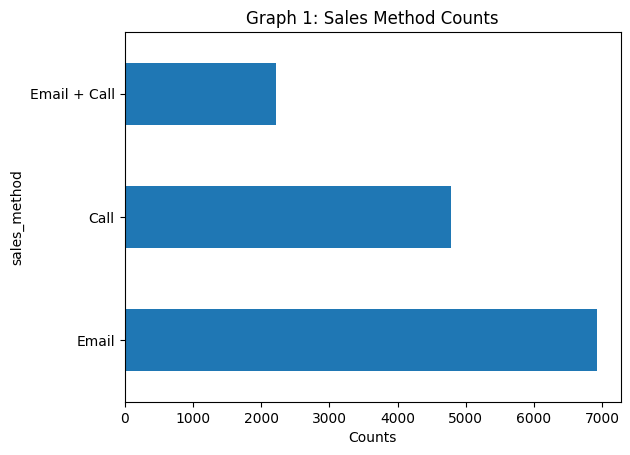

In [17]:
# plot count of sales_method
product_sales.sales_method.value_counts().plot.barh().set_title('Graph 1: Sales Method Counts')
plt.xlabel('Counts')
plt.savefig('Graph 1.png', bbox_inches='tight');

In graph 2, most products sold are bought together in groups between 8 and 12 products in each group. For example, most customers bought around 10 products.

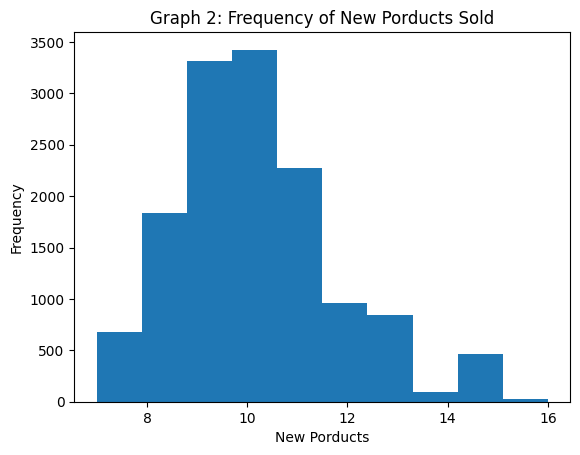

In [18]:
# plot frequency of number products sold
ax = product_sales.nb_sold.plot.hist()
ax.set_title('Graph 2: Frequency of New Porducts Sold')
ax.set_xlabel('New Porducts')
plt.savefig('Graph 2: Frequency of New Porducts Sold.png');

**The company is succeeding at attracting new customers.** In graph 3, new customers are mostly new to the company.

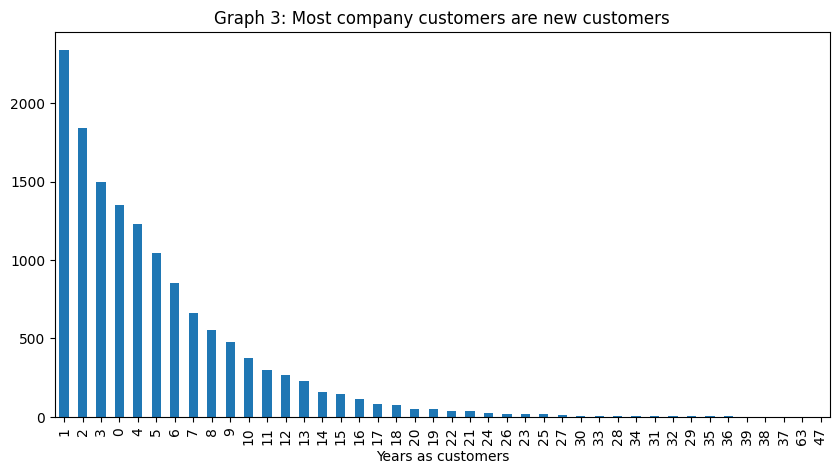

In [19]:
# plot count of years_as_customer
ax = product_sales.years_as_customer.value_counts().plot.bar(figsize=(10,5))
ax.set_title('Graph 3: Most company customers are new customers')
ax.set_xlabel('Years as customers')
plt.savefig('Graph 3: Most company customers are new customers.png');

In graph 4, the **sales were the highest the first week but the lowest the sixth week.**

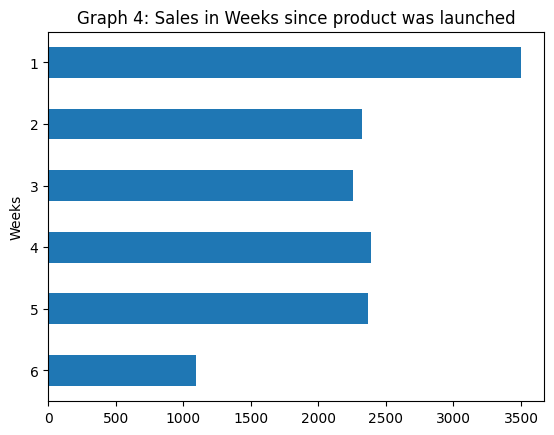

In [20]:
# plot count of weeks since product was launched
ax = product_sales.week.value_counts().reindex([1,2,3,4,5,6])[::-1].plot.barh()
ax.set_title('Graph 4: Sales in Weeks since product was launched')
ax.set_ylabel('Weeks')
plt.savefig('Graph 4: Sales in Weeks since product was launched.png');

In graph 5, **there is a positive correlation between website visits and products sold.** The more visits, the more products sold.

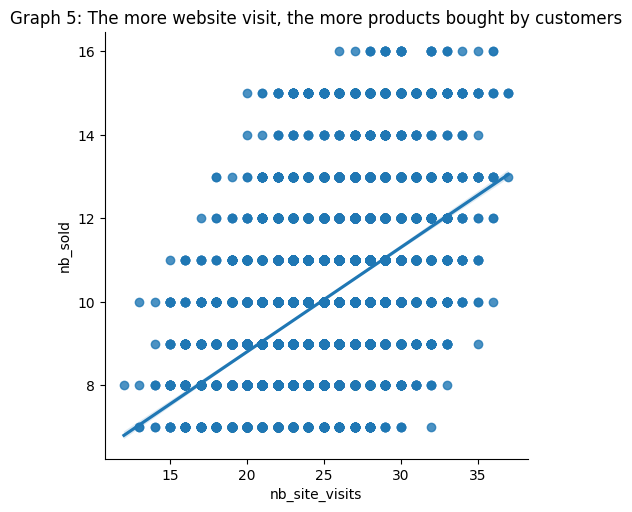

In [21]:
# plot a scatter plot with regression line for website visits and products sold
ax = sns.lmplot(data=product_sales, x='nb_site_visits', y='nb_sold')
plt.title('Graph 5: The more website visit, the more products bought by customers')
plt.savefig('Graph 5: The more website visit, the more products bought by customers.png');

Graph 6 has two plot about revenue and sales methods. Each tells a different story. For example, the Email + Call brings more money on average then the other methods. It's median was the highest. However, the Email method overall brought more revenue than the other methods since it was used the most.

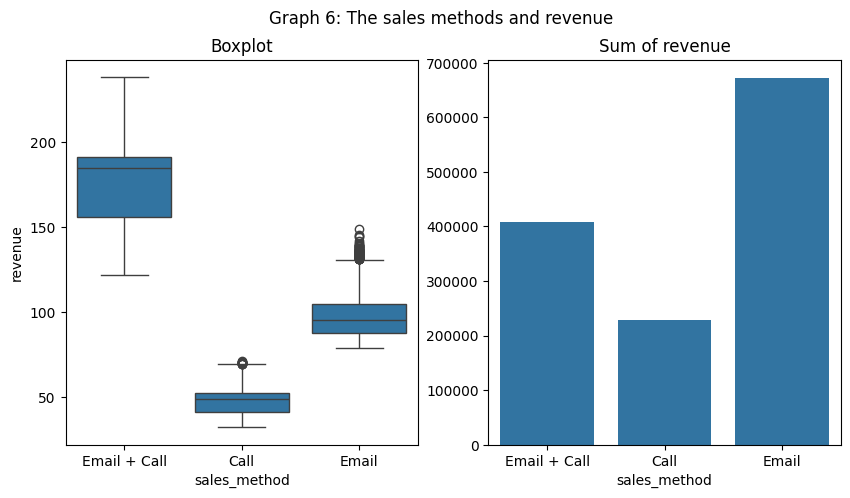

In [22]:
# plot two plots together (boxplot & count) for revenue and sales_methods
order = ['Email + Call', 'Call', 'Email']

fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(data=product_sales, x='sales_method', y='revenue', ax=ax[0], order=order)

revenue_sum = product_sales.groupby('sales_method')['revenue'].sum().to_frame()
sns.barplot(x=revenue_sum.index, y=revenue_sum.revenue, ax=ax[1], order=order)

fig.suptitle('Graph 6: The sales methods and revenue')
ax[0].set_title('Boxplot')
ax[1].set_title('Sum of revenue')
ax[1].set_ylabel('')
plt.savefig('Graph 6: The sales methods and revenue.png');

In [24]:
# the IQR of each method's revenue
from scipy.stats import iqr

call = product_sales.loc[product_sales.sales_method=='Call', 'revenue']
email = product_sales.loc[product_sales.sales_method=='Email', 'revenue']
email_call = product_sales.loc[product_sales.sales_method=='Email + Call', 'revenue']

print('Call IQR: ', iqr(call))
print('Email IQR: ', iqr(email))
print('Email + Call IQR: ', iqr(email_call))

Call IQR:  11.21
Email IQR:  17.290000000000006
Email + Call IQR:  35.33500000000001


In [25]:
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


Graph 7 shows the a univariate (one variable) distribution using kernel density estimation (KDE). KDE represents the data using a continuous probability density curve in one or more dimensions (source).

Essentially, the probability of getting a sale with smaller revenue is far greater than a sale with a larger revenue.

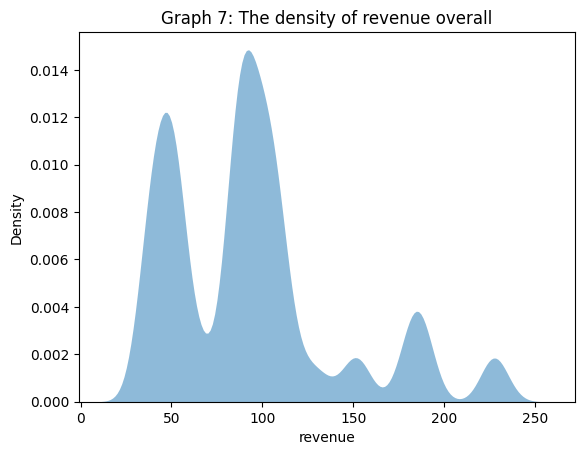

In [26]:
# plot the density of revenue
ax = sns.kdeplot(data=product_sales, x='revenue', alpha=.5, linewidth=0, fill=True)
plt.title('Graph 7: The density of revenue overall')
plt.savefig('Graph 7: The density of revenue overall.png')

In graph 8, the KDE (with histogram) from the previous graph is broken down by sale methods. We can see that revenue in each category is more or less distinct.

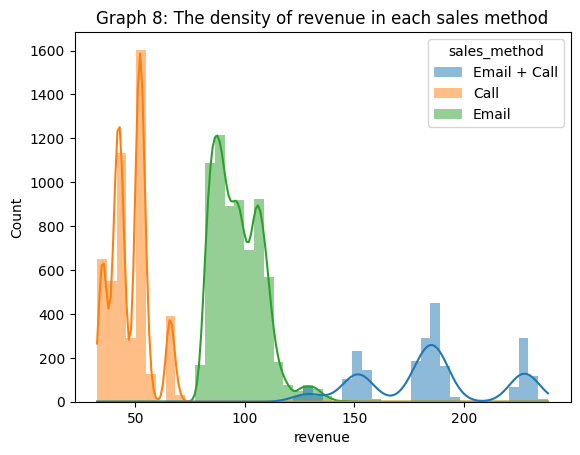

In [27]:
# plot the density of revenue
ax = sns.histplot(data=product_sales, x='revenue', hue='sales_method', 
                 fill=True, common_norm=True, palette="tab10", alpha=.5, linewidth=0, kde=True)
plt.title('Graph 8: The density of revenue in each sales method')
plt.savefig('Graph 8: The density of revenue in each sales method.png')

Are the weeks of sales matter? Yes. Each week, the company is increasing it product sales revenue (graph 9).

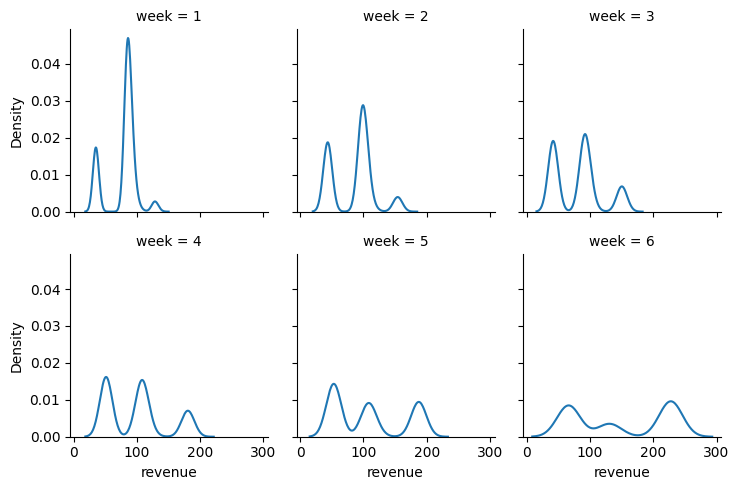

In [28]:
# multi-plot of revenue density per week
g = sns.FacetGrid(product_sales, col="week", height=2.5, col_wrap=3)
g.map(sns.kdeplot, "revenue")
plt.savefig('Graph 9: multi-plot of revenue density per week.png');

In graph 10, the Email + Call sale method is notably getting larger revenue each week.

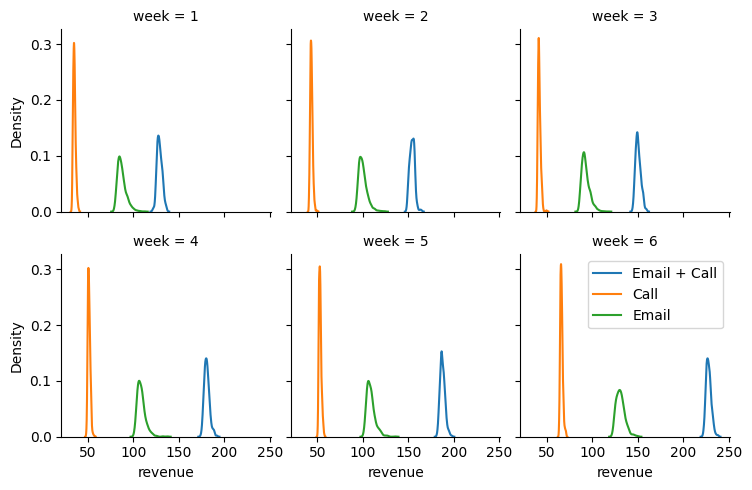

In [29]:
# multi-plot of revenue density in each sales method week by each week
g = sns.FacetGrid(product_sales, col="week", hue='sales_method', height=2.5, col_wrap=3)
g.map(sns.kdeplot, "revenue"),
plt.legend()
plt.savefig('Graph 10: multi-plot of revenue density per week.png');

A different representation of the the above graph (graph 11).

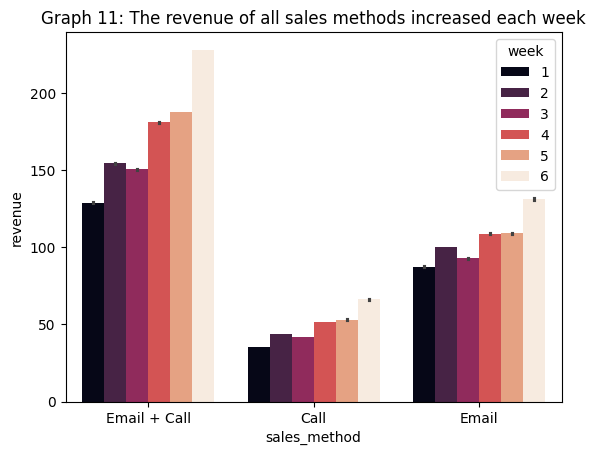

In [30]:
# plot of revenue in each sales method in each week
sns.barplot(data=product_sales, x="sales_method", y="revenue", hue="week", palette="rocket")
plt.title('Graph 11: The revenue of all sales methods increased each week')
plt.savefig('Graph 11: The revenue of all sales methods increased each week.png')

In graph 12, even when the number of new products is the same, Email + Call has more revenue. It might indicate that this method is selling new products with higher prices.

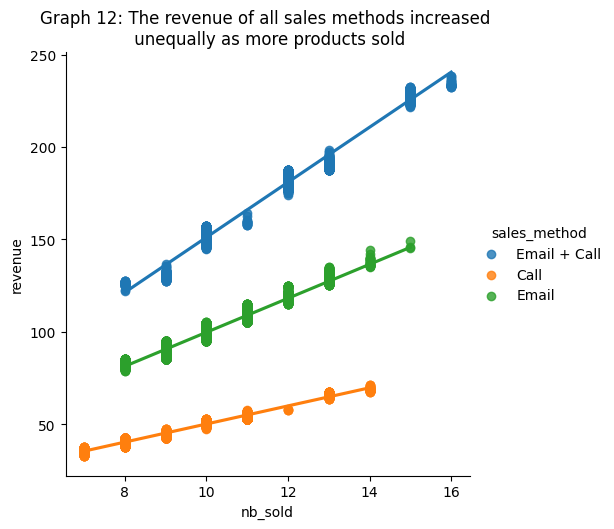

In [31]:
# a regression plot of revenue in each sales method by new products sold
sns.lmplot(
    data=product_sales, x="nb_sold", y="revenue", hue="sales_method")

plt.title('Graph 12: The revenue of all sales methods increased \n unequally as more products sold')
plt.savefig('Graph 12: The revenue of all sales methods increased but unequally.png')

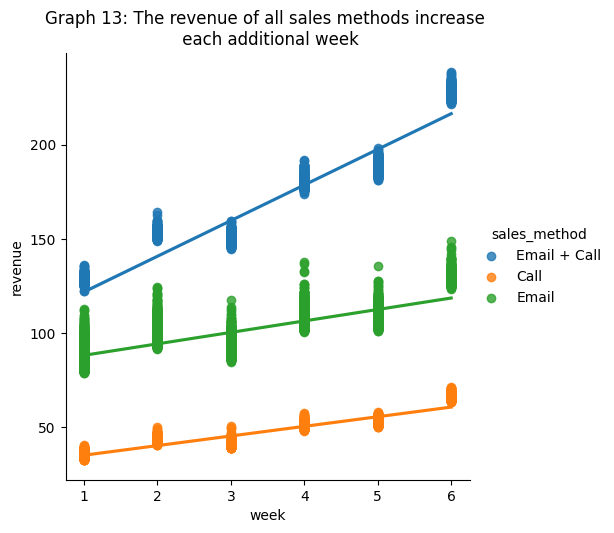

In [32]:
# a regression plot of revenue in each sales method by new products sold
sns.lmplot(data=product_sales, x="week", y="revenue", hue="sales_method")

plt.title('Graph 13: The revenue of all sales methods increase \n each additional week')
plt.savefig('Graph 13: The revenue of all sales methods increase each additional week.png')

The below table is a pivot table of the means and medians of revenue of each sales method per week.

In [33]:
# the mean and medians of the methods' revenue per week 
product_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()

In [34]:
# the average revenue of each sales method
product_sales.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,47.597467
Email,97.127684
Email + Call,183.651233


## Summary

### Total customers for each approach:
- Total: 13,926 (15,000 with null values)
    - Call: 4,781 (4,962)
    - Email: 6,922 (7,466)
    - Email + Call: 2,223 (2,572)

There were more sales via email 6,922 (7,466) more than the other methods since it's inexpensive to use. Moreover, the Call comes in second 4,781 (4,962) while Email + Call is last with 2,223 (2,572) counts (see graph 1).

### The spread of revenue for each method and overall:

- Overall, **the spread of the revenue looks non-normal and it's skewed to the right** (see graph 7). It also has five peaks.
- **Call**: It has the **smallest spread and median** among the three methods. Its interquartile range (IQR) is $11 (see graph 6).
- **Email**: It has the **second smallest spread and median** among the three methods. Its interquartile range (IQR) is $17 (see graph 6).
- **Email + Call**: It has the **largest spread and median** among the three methods. Its interquartile range (IQR) is $35 (see graph 6).

**Email + Call seems to be the most lucrative sale method**. However, the **Email only method brought in more revenue in total** since it was used more than the other methods. The **Call method is by far the worst preforming method** since it's expensive to implement and has the lowest revenue amounts.

### Differences in revenue over time for each of the methods

- Yes. The revenue for method indeed increased over time; however, the change varies among the methods (see graph 11).
- Call has the smallest increase. It has means (or averages) of 35 in week 1 and 66 in week 6, a 31 increase (see graph 11).
- Email has the second smallest increased. It has means of 87 in week 1, and 130 in week 6, a 43 increase (see graph 11).
- Email + Call has the largest increase. For instance, its means for week 1 and week 6 are 128 and 227, respectively. That's an increase of $99 (see graph 11).

  ### Best method to use 

**I recommend that the company continues to use the Email + Call method** since it captures the most revenue with the potential to significantly increase over time (see graph 11).

## Business Metrics


The company's goal is to earn higher revenue using the best sales method. I would recommend that the company uses the average revenue amount of their preferred sales method as their metric.

Based on the data, Email + Call method has the highest sale revenue average (183 dollars). This is while Email (97 dollars) and Call (47 dollars) have lower average revenue (see graph 11). If their preferred sales method is Email + Call, the sales team should use its revenue average (183 dollars) as a baseline for whether a sale was more lucrative (above average) or not (below average).

Moreover, the sales team should recognize that sale averages overall and weekly are different since sale averages increase every week (see graph 6 and 11). Importantly, the first weeks could have lower revenue average amount than ($183), for instance.

## Recommendations
- I recommend that the company continues to use the Email + Call method since it captures the most revenue with the potential to significantly increase over time (see graph 11).
- I would recommend that the company uses the average revenue amount of their preferred sales method as their metric to monitor for strong and increasing sale revenues.
- Consider keeping the Email sale method for its inexpensive implementation.
- Consider stop using the Call method since it's expensive (30 minutes per customer) while having the lowest revenue amounts.
- Improve data collection:
    - Figure out why there are missing values in the revenue column (1074 missing in the data)